<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1122 18:10:52.976786 140276616094528 module_wrapper.py:139] From /tmp/ipykernel_1929454/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1122 18:10:52.980171 140276616094528 module_wrapper.py:139] From /tmp/ipykernel_1929454/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
#data_path = "/home/ajita/Documents/data_integration/Immune/Immune_ALL_human.h5ad"
data_path = "/home/ajita/Documents/data_integration/Human_Retina/Human_Retina.h5ad"
#Lung_wrong_label_10
data_path = "/home/ajita/Documents/data_integration/Lung/Lung_wrong_label_10.h5ad"
data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_NA_0.5.h5ad" #0.2.


In [9]:
name = "Immune_Human"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation', # 16
                 'Lung' : 'cell_type', # 
                 'Pancreas' : 'celltype', #
                 'Human_Mouse' : "celltype", #
                 "Human_Retina":"Subcluster" #
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  

W1122 18:10:53.944320 140276616094528 module_wrapper.py:139] From /tmp/ipykernel_1929454/2562052323.py:9: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1122 18:10:53.947305 140276616094528 module_wrapper.py:139] From /tmp/ipykernel_1929454/2562052323.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-11-22 18:10:53.948801: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-22 18:10:53.990635: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-11-22 18:10:53.999078: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558b046d3170 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-22 18:10:53.999125: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-1

came in load_gene
updated hvg


W1122 18:11:17.774966 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 18:11:17.790591 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:316: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1122 18:11:17.791761 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1122 18:11:17.792568 140276616094528 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.c

here [2 4 1 ... 1 2 2]
Shape self.data_train: (33506, 2000)
Shape self.data_test: (33506, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)


W1122 18:11:18.162513 140276616094528 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:345: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1122 18:11:18.300497 140276616094528 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:44: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1122 18:11:18.302209 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:657: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)
inferred check Tensor("Max:0", shape=(), dtype=float32)


W1122 18:11:18.639950 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:41: The name tf.log is deprecated. Please use tf.math.log instead.

W1122 18:11:18.657999 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_new_semi.py:41: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.

W1122 18:11:18.718509 140276616094528 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:152: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)


W1122 18:11:18.802572 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:174: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.

W1122 18:11:18.803962 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:183: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W1122 18:11:18.859447 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:192: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1122 18:11:18.908751 140276616094528 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Immune/Immune_Human_NA_0.5.h5ad ... 


W1122 18:11:21.198872 140276616094528 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_scanvi_semisupervised.py:208: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 392.6480, d_loss: -0.0018 , db_loss: 2.2541
Epoch : [1] ,  a_loss = 351.7230, d_loss: -0.0020 , db_loss: 3.1606
Epoch : [2] ,  a_loss = 479.0680, d_loss: -0.0025 , db_loss: 1.1572
Epoch : [3] ,  a_loss = 395.9388, d_loss: -0.0034 , db_loss: 2.4336
Epoch : [4] ,  a_loss = 342.4608, d_loss: -0.0026 , db_loss: 1.6308
Epoch : [5] ,  a_loss = 339.3590, d_loss: -0.0026 , db_loss: 2.6659
Epoch : [6] ,  a_loss = 468.0408, d_loss: -0.0021 , db_loss: 1.0492
Epoch : [7] ,  a_loss = 333.4161, d_loss: -0.0025 , db_loss: 1.6486
Epoch : [8] ,  a_loss = 444.3499, d_loss: -0.0016 , db_loss: 0.8556
Epoch : [9] ,  a_loss = 429.3098, d_loss: -0.0016 , db_loss: 1.3275
Epoch : [10] ,  a_loss = 371.4229, d_loss: -0.0018 , db_loss: 1.7775
Epoch : [11] ,  a_loss = 334.5528, d_loss: -0.0016 , db_loss: 1.8362
Epoch : [12] ,  a_loss = 416.9458, d_loss: -0.0013 , db_loss: 1.1570
Epoch : [13] ,  a_loss = 408.0583, d_loss: -0.0014 , db_loss: 0.5990
Epoch : [14] ,  a_loss = 463.4742, d_loss: -

Epoch : [119] ,  a_loss = 281.3651, d_loss: -0.1369 , db_loss: 1.9171
Epoch : [120] ,  a_loss = 389.9577, d_loss: -0.6242 , db_loss: 0.9107
Epoch : [121] ,  a_loss = 403.3554, d_loss: -0.6483 , db_loss: 0.8873
Epoch : [122] ,  a_loss = 268.0120, d_loss: -0.0063 , db_loss: 2.6210
Epoch : [123] ,  a_loss = 396.8620, d_loss: -0.8462 , db_loss: 1.0165
Epoch : [124] ,  a_loss = 392.1748, d_loss: -0.0866 , db_loss: 1.1776
Epoch : [125] ,  a_loss = 315.8950, d_loss: -0.2576 , db_loss: 2.3228
Epoch : [126] ,  a_loss = 273.1502, d_loss: -0.0270 , db_loss: 2.2587
Epoch : [127] ,  a_loss = 394.6590, d_loss: -0.1358 , db_loss: 1.0821
Epoch : [128] ,  a_loss = 291.4958, d_loss: -0.0242 , db_loss: 2.0890
Epoch : [129] ,  a_loss = 344.1919, d_loss: -0.0967 , db_loss: 1.0001
Epoch : [130] ,  a_loss = 390.6041, d_loss: -0.1373 , db_loss: 0.7078
Epoch : [131] ,  a_loss = 289.4127, d_loss: -0.0322 , db_loss: 1.7126
Epoch : [132] ,  a_loss = 392.6641, d_loss: -0.1394 , db_loss: 1.0304
Epoch : [133] ,  a_l

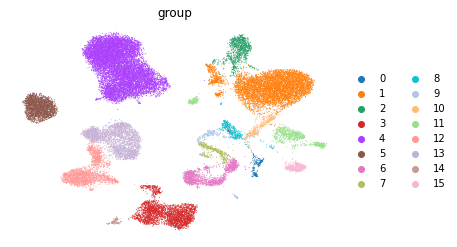

None


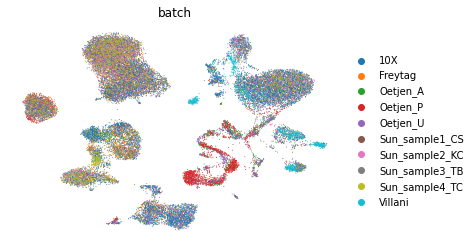

None
Computing NMI ...
Done !
NMI = 0.8283574987838779
Epoch : [201] ,  a_loss = 303.7982, d_loss: -0.0046 , db_loss: 2.0381
Epoch : [202] ,  a_loss = 300.0222, d_loss: -0.0040 , db_loss: 1.7980
Epoch : [203] ,  a_loss = 323.1184, d_loss: -0.0034 , db_loss: 2.1283
Epoch : [204] ,  a_loss = 269.2154, d_loss: -0.0043 , db_loss: 2.5367
Epoch : [205] ,  a_loss = 267.8031, d_loss: -0.0041 , db_loss: 2.4350
Epoch : [206] ,  a_loss = 305.2158, d_loss: -0.0035 , db_loss: 1.9646
Epoch : [207] ,  a_loss = 382.1611, d_loss: -0.0034 , db_loss: 1.0156
Epoch : [208] ,  a_loss = 385.9944, d_loss: -0.0028 , db_loss: 0.9567
Epoch : [209] ,  a_loss = 292.1833, d_loss: -0.0038 , db_loss: 2.9086
Epoch : [210] ,  a_loss = 298.8228, d_loss: -0.0032 , db_loss: 2.2557
Epoch : [211] ,  a_loss = 389.3217, d_loss: -0.0026 , db_loss: 0.7996
Epoch : [212] ,  a_loss = 377.7411, d_loss: -0.0029 , db_loss: 0.9091
Epoch : [213] ,  a_loss = 323.8731, d_loss: -0.0032 , db_loss: 1.8326
Epoch : [214] ,  a_loss = 335.9833,

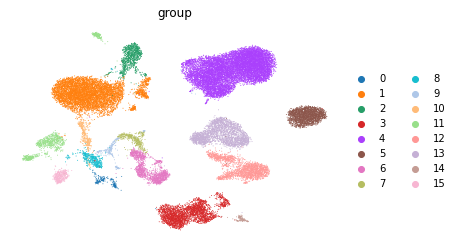

None


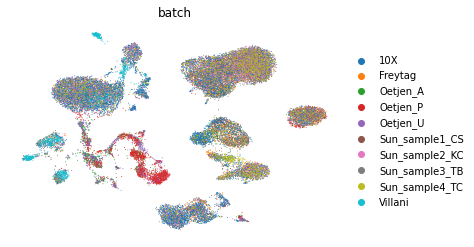

None
Computing NMI ...
Done !
NMI = 0.8345046530572005
Epoch : [251] ,  a_loss = 382.1176, d_loss: -0.5208 , db_loss: 0.8656
Epoch : [252] ,  a_loss = 289.6894, d_loss: -0.7182 , db_loss: 2.2989
Epoch : [253] ,  a_loss = 384.6989, d_loss: -0.7753 , db_loss: 1.0856
Epoch : [254] ,  a_loss = 274.7321, d_loss: -0.7793 , db_loss: 2.7518
Epoch : [255] ,  a_loss = 306.4530, d_loss: -0.8557 , db_loss: 1.6671
Epoch : [256] ,  a_loss = 323.3497, d_loss: -1.0104 , db_loss: 2.4335
Epoch : [257] ,  a_loss = 275.6717, d_loss: -0.7188 , db_loss: 2.1482
Epoch : [258] ,  a_loss = 267.5040, d_loss: -1.0136 , db_loss: 1.9426
Epoch : [259] ,  a_loss = 290.5098, d_loss: -0.8783 , db_loss: 2.2596
Epoch : [260] ,  a_loss = 272.8823, d_loss: -0.1443 , db_loss: 2.0723
Epoch : [261] ,  a_loss = 271.2397, d_loss: -1.0504 , db_loss: 1.8925
Epoch : [262] ,  a_loss = 392.7165, d_loss: -1.0038 , db_loss: 0.6772
Epoch : [263] ,  a_loss = 390.6847, d_loss: -0.7565 , db_loss: 0.6880
Epoch : [264] ,  a_loss = 382.2841,

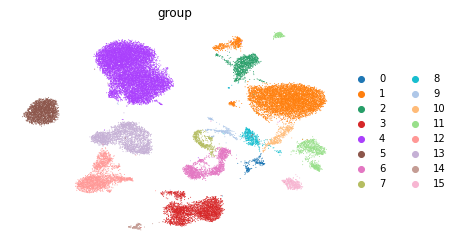

None


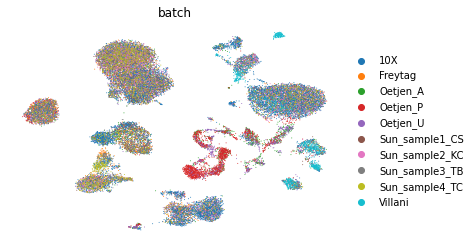

None
Computing NMI ...
Done !
NMI = 0.8296681989987867


In [10]:
#import model
#import model_wo_Dis as model# without Discriminator
#import model_wo_BC as model # without Batch Classiifer

import model_scanvi_semisupervised as model

#import model_only_scanvi as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

